In [ ]:
# === 1. Install & Authenticate GEE ===
!pip install earthengine-api -q

import ee
ee.Authenticate()  # Follow the link, sign in & paste token
ee.Initialize(project='orion-astrathon')

# === 2. Load India's Boundary ===
india = ee.FeatureCollection("FAO/GAUL/2015/level0").filter(ee.Filter.eq('ADM0_NAME', 'India'))

# === 3. Load & Clip GPWv4 Population Data (2020) ===
gpw = ee.ImageCollection("CIESIN/GPWv411/GPW_Population_Count").filterDate('2020-01-01', '2020-12-31')
gpw_image = gpw.mean().clip(india)

# === 4. Load & Clip GHSL Urbanization Data ===
ghsl = ee.Image("JRC/GHSL/P2016/BUILT_LDSMT_GLOBE_V1")
ghsl_image = ghsl.clip(india)


# === 5. Load & Clip VIIRS Nighttime Lights Data ===
viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG").filterDate('2020-01-01', '2020-12-31')
viirs_image = viirs.mean().select('avg_rad').clip(india)

# === 6. Export Population Data ===
task1 = ee.batch.Export.image.toDrive(
    image=gpw_image,
    description='GPW_Population_2020_India',
    folder='GEE_Data',
    scale=1000,
    region=india.geometry(),
    fileFormat='GeoTIFF'
)
task1.start()

# === 7. Export GHSL Urbanization Data ===
task2 = ee.batch.Export.image.toDrive(
    image=ghsl_image,
    description='GHSL_Urbanization_2014_India',
    folder='GEE_Data',
    scale=100,
    region=india.geometry(),
    fileFormat='GeoTIFF'
)
task2.start()

# === 8. Export VIIRS Nighttime Lights Data ===
task3 = ee.batch.Export.image.toDrive(
    image=viirs_image,
    description='VIIRS_Nighttime_2020_India',
    folder='GEE_Data',
    scale=500,
    region=india.geometry(),
    fileFormat='GeoTIFF'
)
task3.start()

print("✅ Export tasks started. Go to the Earth Engine Tasks tab and monitor the progress.")


✅ Export tasks started. Go to the Earth Engine Tasks tab and monitor the progress.


In [ ]:
# Install Earth Engine and authenticate
!pip install earthengine-api --quiet

import ee
from google.colab import auth
auth.authenticate_user()
ee.Authenticate()
ee.Initialize(project='orion-astrathon')


In [ ]:
# Load India boundary from GEE FeatureCollection
india = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'India'))


In [ ]:
def export_image_to_drive(image, description, folder, scale=500, region=india.geometry()):
    task = ee.batch.Export.image.toDrive(
        image=image.clip(region),
        description=description,
        folder=folder,
        scale=scale,
        region=region,
        fileFormat='GeoTIFF',
        maxPixels=1e13
    )
    task.start()
    print(f"🚀 Export started: {description}")


In [ ]:
viirs_years = list(range(2013, 2024))  # Adjust if needed
for year in viirs_years:
    start = f"{year}-01-01"
    end = f"{year}-12-31"
    viirs_ic = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG") \
                  .filterDate(start, end) \
                  .select("avg_rad")

    annual_viirs = viirs_ic.mean()
    export_image_to_drive(
        image=annual_viirs,
        description=f"VIIRS_{year}",
        folder="Orion_India_Data",
        scale=500
    )


🚀 Export started: VIIRS_2013
🚀 Export started: VIIRS_2014
🚀 Export started: VIIRS_2015


In [ ]:
# Define available years
gpw_years = [2000, 2005, 2010, 2015, 2020]

for year in gpw_years:
    population_collection = ee.ImageCollection("CIESIN/GPWv411/GPW_Population_Density")

    # Filter by year
    population_image = population_collection.filter(ee.Filter.eq('system:index', str(year))).first()

    export_image_to_drive(
        image=population_image,
        description=f"GPW_Population_Density_{year}",
        folder="Orion_India_Data",
        scale=1000
    )


🚀 Export started: GPW_Population_Density_2000
🚀 Export started: GPW_Population_Density_2005
🚀 Export started: GPW_Population_Density_2010
🚀 Export started: GPW_Population_Density_2015
🚀 Export started: GPW_Population_Density_2020


In [ ]:
ghsl_years = [1975, 1990, 2000, 2014]
for year in ghsl_years:
    image = ee.Image(f"JRC/GHSL/P2016/BUILT_LDSMT_GLOBE_V1").select(f'built_{year}')
    export_image_to_drive(
        image=image,
        description=f"GHSL_Built_{year}",
        folder="Orion_India_Data",
        scale=250
    )


🚀 Export started: GHSL_Built_1975
🚀 Export started: GHSL_Built_1990
🚀 Export started: GHSL_Built_2000
🚀 Export started: GHSL_Built_2014


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.4054
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4009
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1219
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0382
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0521
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0896
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0281
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0265
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0836
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0248
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0211
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0211
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0303
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0215
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0201
Epoch 16/300
4/4 ━━

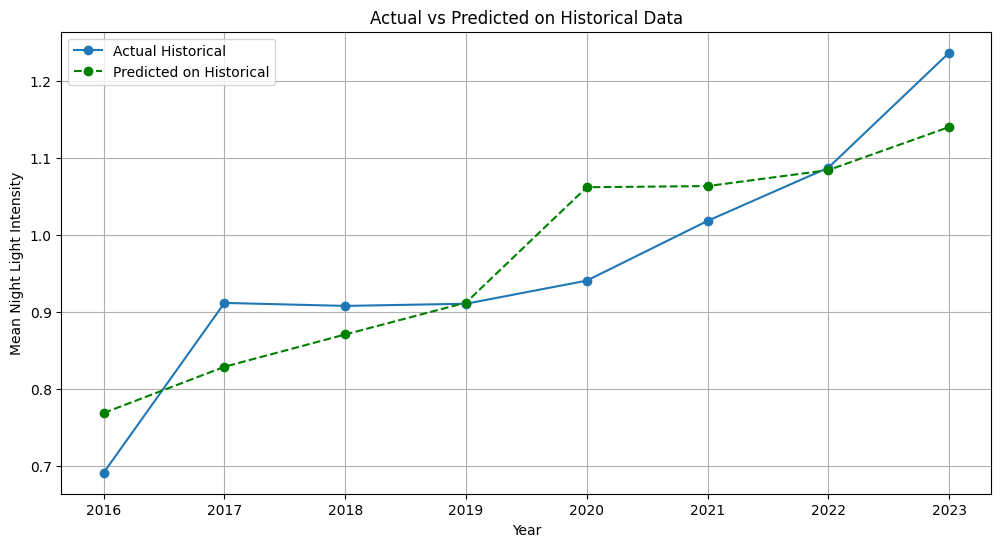

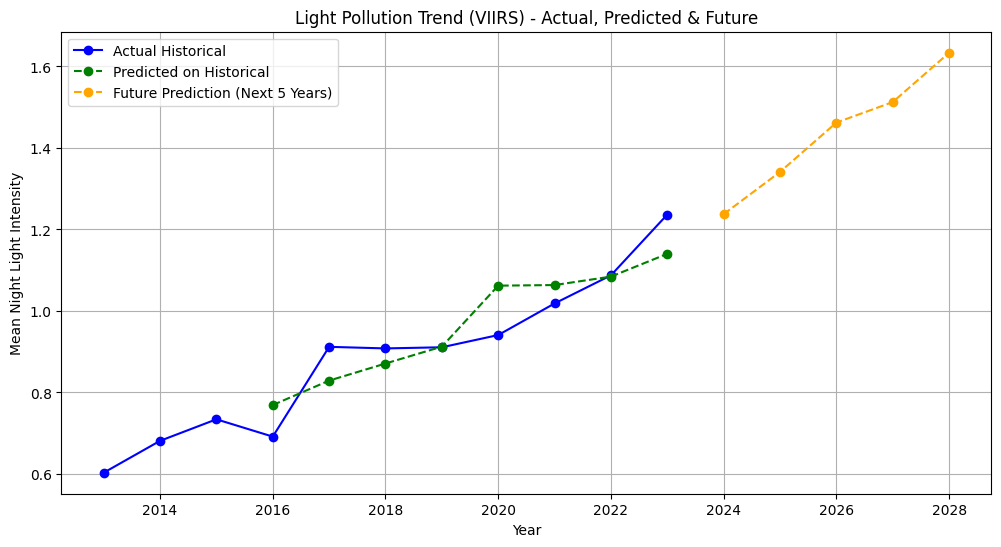

Future predictions saved to future_predictions.csv


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import glob
import rasterio
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------- 1. Load VIIRS Data ----------
folder_path = '/content/drive/MyDrive/Orion_India_Data'
file_paths = sorted(glob.glob(folder_path + '/*.tif'))

years = []
mean_brightness = []

for path in file_paths:
    year = int(path.split('_')[-1].split('.')[0])
    years.append(year)
    with rasterio.open(path) as src:
        data = src.read(1)
        mean_brightness.append(np.nanmean(data))

# ---------- 2. Preprocessing ----------
data = np.array(mean_brightness).reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Sequence creation
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 3
X, y = create_sequences(scaled_data, seq_length)

# ---------- 3. Model ----------
model = Sequential()
model.add(Input(shape=(seq_length, 1)))
model.add(LSTM(256, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='tanh'))
model.add(Dense(1, kernel_regularizer=l2(0.001)))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')

es = EarlyStopping(monitor='loss', patience=30, restore_best_weights=True)

history = model.fit(X, y, epochs=300, batch_size=2, callbacks=[es], verbose=1)

# ---------- 4. Predict on Historical Data ----------
y_pred_scaled = model.predict(X, verbose=0)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_actual = scaler.inverse_transform(y)

# ---------- 5. Evaluate Model ----------
mse = mean_squared_error(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae:.4f}, RMSE: {rmse:.4f}')

# ---------- 6. Future Prediction ----------
future_steps = 5
future_years = [years[-1] + i for i in range(1, future_steps + 1)]
last_seq = scaled_data[-seq_length:].reshape(1, seq_length, 1)

future_preds_scaled = []
for _ in range(future_steps):
    pred = model.predict(last_seq, verbose=0)
    future_preds_scaled.append(pred[0, 0])
    pred_reshaped = np.reshape(pred, (1, 1, 1))
    last_seq = np.append(last_seq[:, 1:, :], pred_reshaped, axis=1)

future_preds = scaler.inverse_transform(np.array(future_preds_scaled).reshape(-1, 1))

# ---------- 7. Plot Historical Actual vs Predicted ----------
plt.figure(figsize=(12, 6))
plt.plot(years[seq_length:], y_actual.flatten(), 'o-', label='Actual Historical')
plt.plot(years[seq_length:], y_pred.flatten(), 'o--', label='Predicted on Historical', color='green')
plt.xlabel('Year')
plt.ylabel('Mean Night Light Intensity')
plt.title('Actual vs Predicted on Historical Data')
plt.legend()
plt.grid(True)
plt.show()

# ---------- 8. Plot Full Trend (Historical + Future) ----------
all_years = years + future_years
all_brightness = mean_brightness + list(future_preds.flatten())

plt.figure(figsize=(12, 6))
plt.plot(years, mean_brightness, 'o-', label='Actual Historical', color='blue')
plt.plot(years[seq_length:], y_pred.flatten(), 'o--', label='Predicted on Historical', color='green')
plt.plot(future_years, future_preds.flatten(), 'o--', label='Future Prediction (Next 5 Years)', color='orange')
plt.xlabel('Year')
plt.ylabel('Mean Night Light Intensity')
plt.title('Light Pollution Trend (VIIRS) - Actual, Predicted & Future')
plt.legend()
plt.grid(True)
plt.show()

# ---------- 9. Save Future Predictions ----------
import pandas as pd
future_df = pd.DataFrame({
    'year': future_years,
    'predicted_mean_light': future_preds.flatten()
})
future_df.to_csv('/content/future_predictions.csv', index=False)
print('Future predictions saved to future_predictions.csv')
